# DS-HW[1] Data Parsing and Cleansing

## Problem 1. Data Cleansing

### 1) Plot the data for each parameter.

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

data = pd.read_csv("dataset/ds_hw1_dataset.csv")

csv 파일을 불러오기 위해 pandas를 import하고 median 값 계산, nan 값 찾기 등을 위해 numpy를 import한다.

데이터 파싱한 결과를 json 파일로 저장하기 위해 json을 import하였고,
그래프 개형을 확인하기 위해 matplotlib.pyplot을 import하였다.

dataset에 있는 csv 파일을 읽어와 data 변수에 저장하였다.

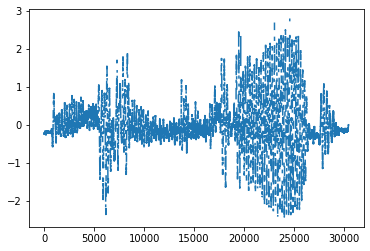

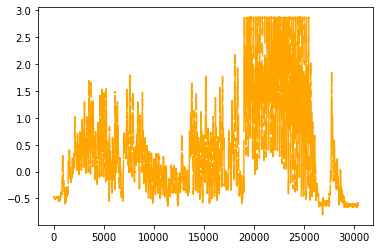

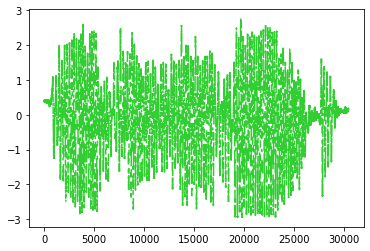

In [2]:
plt.plot(data[' PORT4_CHN1'])
plt.show()
plt.plot(data[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(data[' PORT7_CHN1'], color='limegreen')
plt.show()

data의 port4,port6,port7를 모두 plot했을 때의 결과이다.

### 2) Find the number of missing values for each parameter.

In [20]:
data.isnull().sum()

nSeq               0
 DI                0
 PORT4_CHN1    10141
 PORT6_CHN1     2834
 PORT7_CHN1     6769
dtype: int64

port 4,6,7이 가지고 있는 nan 데이터의 수를 계산해보니 port4는 10141, port6는 2834개, port7은 6769개가 존재하는 것을 확인할 수 있다.

### 3) Treat the missing values like this:

A) Replace the missing value with the average value within the window size(window=100) after the interval with missing values for each parameter.

In [6]:
dataA = data.copy()

window = 100

for x in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    for i in range(len(dataA)):
        Sum = 0
        if pd.isna(dataA[x].iloc[i]):
            if i < window/2:
                for j in range(i+51):
                    if not np.isnan(dataA[x].iloc[j]):
                        Sum += dataA[x].iloc[j]
                avg = Sum/(i+50)

            elif i > len(dataA) - window/2:
                for j in range(i-50,len(dataA)):
                    if not np.isnan(dataA[x].iloc[j]):
                        Sum += dataA[x].iloc[j]
                avg = Sum/(len(dataA) - i + 50)

            else:
                for j in range(i-50,i+50):
                    if not np.isnan(dataA[x].iloc[j]):
                        Sum += dataA[x].iloc[j]
                avg = Sum/(window)
                
            dataA[x].iloc[i] = avg

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_19384\3609019259.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA[x].iloc[i] = avg


단순히 모든 데이터의 평균값이 아니라 현재 인덱스 i에서 -50, +50의 윈도우 사이즈의 평균을 구하는 것이므로 for 문을 통해 nan값이 아닌 값들을 더해주었고, 이를 윈도우 사이즈로 나눈 평균값 avg을 nan값을 가지는 인덱스의 데이터를 삽입해주었다. i 값이 50보다 작을 때는 i-50부터 시작하게 되면 인덱스 오류가 나므로 0부터 시작하게끔 설정하였다.

B) Replace the missing value with the median value within the window size(window=100) after the interval with missing values for each parameter.

In [9]:
dataB = data.copy()

window = 100

for x in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    for i in range(len(dataB)):
        arr = []
        if pd.isna(dataB[x].iloc[i]):
            if i < window/2:
                for j in range(i+50):
                    if not np.isnan(dataB[x].iloc[j]):
                        arr.append(dataB[x].iloc[j])
            
            elif i > len(dataB) - window/2:
                for j in range(i-50,len(dataB)):
                    if not np.isnan(dataB[x].iloc[j]):
                        arr.append(dataB[x].iloc[j])

            else:
                for j in range(i-50,i+50):
                    if not np.isnan(dataB[x].iloc[j]):
                        arr.append(dataB[x].iloc[j])
            
            dataB[x].iloc[i] = np.median(arr)

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_19384\3433456147.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataB[x].iloc[i] = np.median(arr)


A 때와 비슷하게 윈도우 사이즈 내의 값들의 중간값으로 nan 값을 대체해야하므로 i의 크기에 따라 범위를 나누고 윈도우 사이즈를 지정하였다. 이후 for문을 돌면서 nan값이 아닌 값들을 배열에 저장하고 np.median 함수를 이용해 배열의 중간값을 nan 값을 가지는 인덱스에 저장하였다.

C) Replace the missing value with the max value within the window size(window=100) after the interval with missing values for each parameter.

In [14]:
dataC = data.copy()

window = 100

for x in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    for i in range(len(dataC)):
        arr = []
        if pd.isna(dataC[x].iloc[i]): 
            if i < window/2:
                for j in range(i+50):
                    if not np.isnan(dataC[x].iloc[j]):
                        arr.append(dataC[x].iloc[j])
            
            elif i > len(dataC) - window/2:
                for j in range(i-50,len(dataC)):
                    if not np.isnan(dataC[x].iloc[j]):
                        arr.append(dataC[x].iloc[j])

            else:
                for j in range(i-50,i+50):
                    if not np.isnan(dataC[x].iloc[j]):
                        arr.append(dataC[x].iloc[j])
        
            dataC[x].iloc[i] = max(arr)

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_19384\3326278332.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC[x].iloc[i] = max(arr)


i의 크기에 따라 for문을 돌면서 nan 값이 아닐 때 배열에 값을 저장하고 max 함수를 이용해 배열의 최댓값을 nan값을 가지는 인덱스에 저장하였다.

D) Replace the missing value with the min value within the window size(window=100) after the interval with missing values for each parameter.

In [16]:
dataD = data.copy()

window = 100

for x in [' PORT4_CHN1', ' PORT6_CHN1', ' PORT7_CHN1']:
    for i in range(len(dataD)):
        arr = []
        if pd.isna(dataD[x].iloc[i]): 
            if i < window/2:
                for j in range(i+50):
                    if not np.isnan(dataD[x].iloc[j]):
                        arr.append(dataD[x].iloc[j])
            
            elif i > len(dataD) - window/2:
                for j in range(i-50,len(dataD)):
                    if not np.isnan(dataD[x].iloc[j]):
                        arr.append(dataD[x].iloc[j])

            else:
                for j in range(i-50,i+50):
                    if not np.isnan(dataD[x].iloc[j]):
                        arr.append(dataD[x].iloc[j])
        
            dataD[x].iloc[i] = min(arr)

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_19384\1749867866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataD[x].iloc[i] = min(arr)


C와 똑같이 작동하면서 min 함수를 이용해 배열의 최솟값을 nan값을 가진 인덱스에 저장한다.

E) Delete data with missing values by using pandas.dropna().

In [19]:
dataE = data.dropna()
dataE

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
1          1    0      -0.2104      -0.4819       0.3759
3          3    0      -0.2119      -0.4819       0.3806
8          8    0      -0.2209      -0.4796       0.3862
9          9    0      -0.2227      -0.4794       0.3859
10        10    0      -0.2253      -0.4786       0.3881
...      ...  ...          ...          ...          ...
30444  30444    0      -0.0078      -0.6147       0.1741
30446  30446    0      -0.0034      -0.6157       0.1780
30447  30447    0      -0.0037      -0.6145       0.1772
30448  30448    0       0.0000      -0.6157       0.1820
30449  30449    0       0.0005      -0.6144       0.1855

[14249 rows x 5 columns]

기존의 data를 dropna함수를 이용해 nan 값을 제외한 데이터를 dataE에 저장하였다.

### 4) Plot the results of 3) problem and compare them.

A) Plot

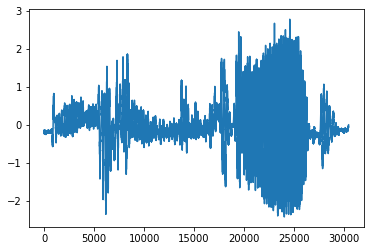

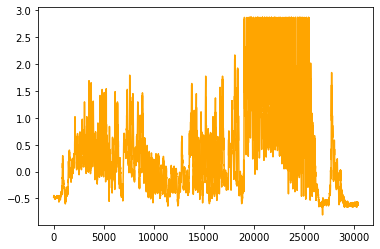

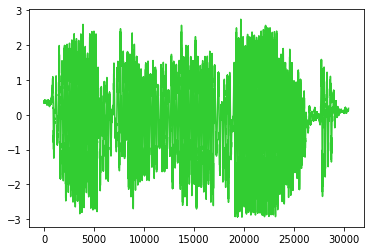

In [7]:
plt.plot(dataA[' PORT4_CHN1'])
plt.show()
plt.plot(dataA[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(dataA[' PORT7_CHN1'], color='limegreen')
plt.show()

nan값을 평균값으로 교체하였기에 본래 data 그래프에서 nan값에 의한 빈 공간이 평균값으로 채워져 그래프 개형의 빈 공간이 채워진 것을 확인할 수 있다.

B) Plot

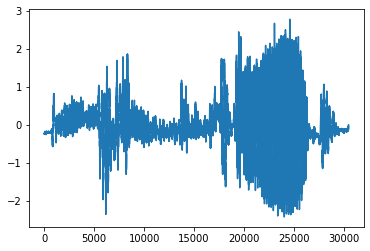

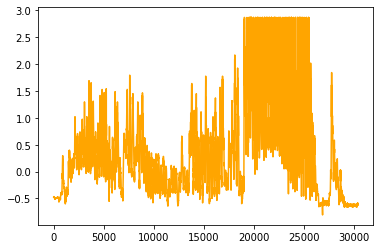

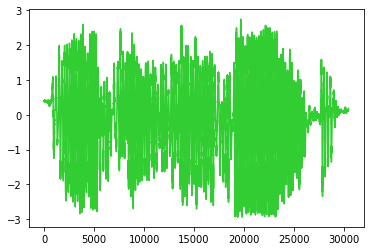

In [10]:
plt.plot(dataB[' PORT4_CHN1'])
plt.show()
plt.plot(dataB[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(dataB[' PORT7_CHN1'], color='limegreen')
plt.show()

In [11]:
dataA

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0    -0.136672      -0.4806     0.377000
1          1    0    -0.210400      -0.4819     0.375900
2          2    0    -0.210300      -0.4822     0.334540
3          3    0    -0.211900      -0.4819     0.380600
4          4    0    -0.214800      -0.4812     0.328345
...      ...  ...          ...          ...          ...
30445  30445    0    -0.075007      -0.6162     0.177700
30446  30446    0    -0.003400      -0.6157     0.178000
30447  30447    0    -0.003700      -0.6145     0.177200
30448  30448    0     0.000000      -0.6157     0.182000
30449  30449    0     0.000500      -0.6144     0.185500

[30450 rows x 5 columns]

In [12]:
dataB

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
0          0    0     -0.23000      -0.4806     0.377000
1          1    0     -0.21040      -0.4819     0.375900
2          2    0     -0.21030      -0.4822     0.407150
3          3    0     -0.21190      -0.4819     0.380600
4          4    0     -0.21480      -0.4812     0.407775
...      ...  ...          ...          ...          ...
30445  30445    0     -0.11965      -0.6162     0.177700
30446  30446    0     -0.00340      -0.6157     0.178000
30447  30447    0     -0.00370      -0.6145     0.177200
30448  30448    0      0.00000      -0.6157     0.182000
30449  30449    0      0.00050      -0.6144     0.185500

[30450 rows x 5 columns]

A에서의 그래프와 차이가 안보여서 dataA와 dataB의 값을 출력해보았다. 결과를 확인하면 dataA와 dataB는 값이 다른 것을 확인할 수 있다. 따라서 median값과 avg 값이 미세하게 달라 두 개형이 눈으로는 차이가 안보이지만 세세한 부분에서는 다르다는 것을 알 수 있다.

C) Plot

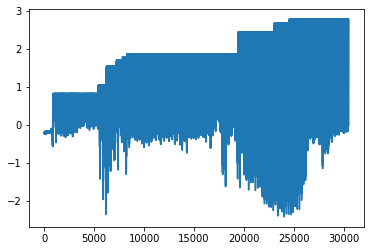

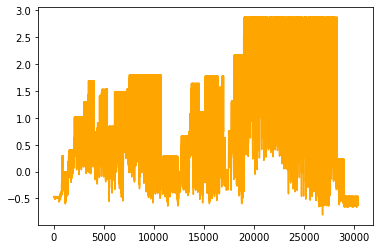

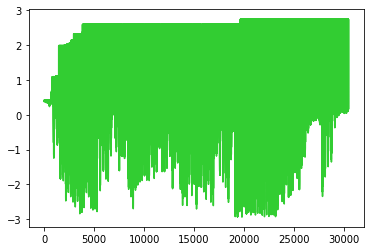

In [18]:
plt.plot(dataC[' PORT4_CHN1'])
plt.show()
plt.plot(dataC[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(dataC[' PORT7_CHN1'], color='limegreen')
plt.show()

윈도우 사이즈 내에서 max 값으로 nan 값을 대체하였으므로, nan 값이 존재하는 index는 모두 max 값으로 채워져서 위와 같은 그래프 개형이 나타나는 것으로 확인할 수 있다.

D) Plot

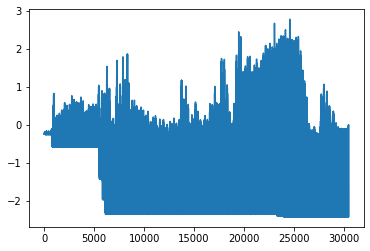

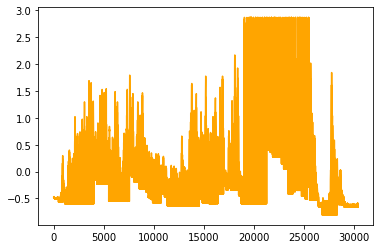

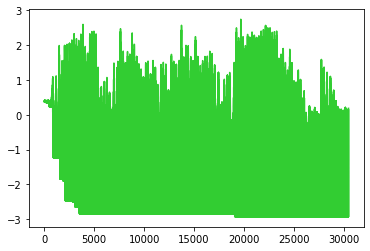

In [17]:
plt.plot(dataD[' PORT4_CHN1'])
plt.show()
plt.plot(dataD[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(dataD[' PORT7_CHN1'], color='limegreen')
plt.show()

C처럼 D에서는 max가 아닌 min 값으로 대체하였기에 nan 값을 가지는 인덱스가 모두 min값을 가져 위와 같은 그래프 개형이 나타나는 것을 확인할 수 있다.

E) Plot

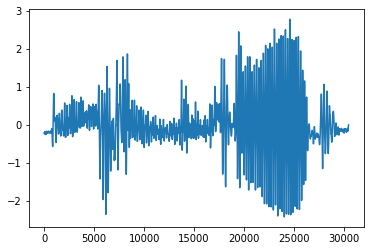

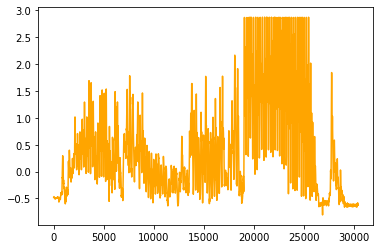

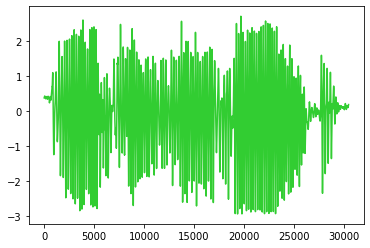

In [21]:
plt.plot(dataE[' PORT4_CHN1'])
plt.show()
plt.plot(dataE[' PORT6_CHN1'], color='orange')
plt.show()
plt.plot(dataE[' PORT7_CHN1'], color='limegreen')
plt.show()

평균값으로 채운 A 그래프와 개형은 비슷하지만 nan 데이터를 가지는 인덱스를 평균값으로 채운 A와는 다르게 nan 데이터를 가지는 인덱스를 없애고 나타낸 그래프이므로 A 그래프보다 빈 공간이 좀 더 있는 것으로 확인할 수 있다.

## Problem 2. Data Parsing

### 1) Parsing ‘Random Interval’

A) Generate two random integer numbers between 0 and 30000 for each parameter

In [10]:
x = np.random.randint(0, 30001)
y = np.random.randint(0, 30001)

a = min(x,y)
b = max(x,y)

print(a, b)

8943 24094


np.random.randint 함수를 이용해 0~30000 사이에서 랜덤으로 정수를 하나 생성하고 그 중에 작은 값은 a, 큰 값은 b로 설정하였다.

B) Parsing the data for the interval between the two values of A) for each parameter.

In [11]:
parsedData = data[np.logical_and(data.nSeq > a, data.nSeq < b)]
parsedData

nSeq   DI   PORT4_CHN1   PORT6_CHN1   PORT7_CHN1
8944    8944    0    -0.092855     0.588506    -1.157600
8945    8945    0    -0.092812     0.716300    -1.093600
8946    8946    0    -0.151900     0.730500    -1.029500
8947    8947    0    -0.156200     0.742400    -0.962200
8948    8948    0    -0.159700     0.750900    -0.898800
...      ...  ...          ...          ...          ...
24089  24089    0     0.431900     2.559100     0.677000
24090  24090    0     0.358198     2.563400     0.699700
24091  24091    0     0.527500     2.563000     0.720000
24092  24092    0     0.421737     2.561800     0.312993
24093  24093    0     0.625500     2.560500     0.762000

[15150 rows x 5 columns]

data의 nSeq가 인덱스이므로 nSeq가 a와 b 사이에 있을 때의 데이터를 parsedData에 저장하였다.

C) Organize the result data to data type “dict” with Key and Value

In [12]:
dictData = parsedData.to_dict('records')
dictData

[{'nSeq': 8944,
  ' DI': 0,
  ' PORT4_CHN1': -0.09285502099936858,
  ' PORT6_CHN1': 0.5885056966938016,
  ' PORT7_CHN1': -1.1576},
 {'nSeq': 8945,
  ' DI': 0,
  ' PORT4_CHN1': -0.09281157120936227,
  ' PORT6_CHN1': 0.7163,
  ' PORT7_CHN1': -1.0936},
 {'nSeq': 8946,
  ' DI': 0,
  ' PORT4_CHN1': -0.1519,
  ' PORT6_CHN1': 0.7305,
  ' PORT7_CHN1': -1.0295},
 {'nSeq': 8947,
  ' DI': 0,
  ' PORT4_CHN1': -0.1562,
  ' PORT6_CHN1': 0.7424,
  ' PORT7_CHN1': -0.9622},
 {'nSeq': 8948,
  ' DI': 0,
  ' PORT4_CHN1': -0.1597,
  ' PORT6_CHN1': 0.7509,
  ' PORT7_CHN1': -0.8988},
 {'nSeq': 8949,
  ' DI': 0,
  ' PORT4_CHN1': -0.1621,
  ' PORT6_CHN1': 0.7572,
  ' PORT7_CHN1': -0.8396},
 {'nSeq': 8950,
  ' DI': 0,
  ' PORT4_CHN1': -0.08386596125394132,
  ' PORT6_CHN1': 0.7571,
  ' PORT7_CHN1': -0.6773513861982693},
 {'nSeq': 8951,
  ' DI': 0,
  ' PORT4_CHN1': -0.1711,
  ' PORT6_CHN1': 0.7524,
  ' PORT7_CHN1': -0.7141},
 {'nSeq': 8952,
  ' DI': 0,
  ' PORT4_CHN1': -0.07895579836986384,
  ' PORT6_CHN1': 0.747

A에서 생성된 a,b를 가지고 a~b까지로 범위를 설정하여 data를 parsing한 데이터 parsedData의 각 row를 dictionary로 반환하였다. (records 형식)

D) Save the result as a json file(ds_hw1_randomInterval.json).

In [19]:
with open('./ds_hw1_randomInterval.json','w') as f:
    json.dump(dictData, f)

앞서 dictionary로 변환한 데이터를 ds_hw1_randomInterval.json 파일로 저장하였다.

### 2) Parsing ‘Main Execution Interval’

A) Find the index with the median value for each parameter(There may be no index, or there may be more than one index.)

In [28]:
port = [[],[],[]]

j = 0
for x in [' PORT4_CHN1',' PORT6_CHN1', ' PORT7_CHN1']:
    for i in range(len(data)):
        if data[x].iloc[i] == np.nanmedian(data[x]):
            port[j].append(i)
    j += 1
            
port

[[1844,
  11729,
  13147,
  13631,
  13690,
  14880,
  15049,
  15761,
  26545,
  27011,
  27634,
  28200],
 [],
 [26194, 29621, 29640, 29642]]

우선 data의 median 값을 찾기 위해 np.nanmedian 함수를 사용하였다. nanmedian 함수를 사용하지 않으면 nan이라는 결과가 나오기에 nan을 제외하고 median을 찾는 함수를 사용하였다. 그 후 median값과 같은 값을 가질 때마다 그 때의 인덱스를 미리 선언한 배열에 삽입하였다. 그 후 배열을 프린트해서 인덱스를 찾은 결과를 확인하였다. 그 결과 PORT4에는 median값과 같은 인덱스가 12개, PORT6에는 0개, PORT7에는 4개가 존재하는 것을 확인할 수 있다.

In [29]:
port8 = []

print(np.nanmedian(data[' PORT6_CHN1']))
for x in [' PORT6_CHN1']:
    for i in range(len(data)):
        if data[x].iloc[i] < np.nanmedian(data[x]) + 0.0005 and data[x].iloc[i] > np.nanmedian(data[x]) - 0.0005:
            port8.append(i)

for x in port8:
    print(x, data[' PORT6_CHN1'].iloc[x])
    
for x in port8:
    if data[' PORT6_CHN1'].iloc[x] == 0.1807 or data[' PORT6_CHN1'].iloc[x] == 0.1809:
        port[1].append(x)
        
port

0.18080000000000002
889 0.1804
1483 0.1809
5608 0.1809
5673 0.1805
8520 0.181
10963 0.1807
14177 0.1804
15535 0.1809
17783 0.1804
22829 0.1812


[[1844,
  11729,
  13147,
  13631,
  13690,
  14880,
  15049,
  15761,
  26545,
  27011,
  27634,
  28200],
 [1483, 5608, 10963, 15535],
 [26194, 29621, 29640, 29642]]

port6의 경우 median 값과 같은 값을 가지는 인덱스가 없었기에 median 값에서 -0.005 ~ +0.005 범위 내에 존재하는 인덱스를 찾기 위해 port8이라는 임의의 배열을 선언하여 이 배열에 인덱스를 삽입하고, 그에 대한 값들을 출력해보았다. 그 결과 median 값 0.1808과 가장 유사한 값은 0.1809, 0.1807 임을 알 수 있다. 따라서 0.1807과 0.1809 값을 가지는 인덱스만을 port[1]에 넣어주고 이를 median 값을 가진 인덱스의 집합이라 생각하기로 하였다. 그 결과 port[1]에는 새로운 4개의 인덱스가 삽입된 것을 확인할 수 있었다.

B) Extract data as much as 15% of the total data length back and forth around the index of A) for each parameter.(At this time, it is coerced into integer type. Also, if the front and back sections exceed the data frame length, the first index (0) and the last index are used.)

In [30]:
interval = len(data) * 0.15
dataArr = [[],[],[]]

for x in port[0]:
    if x > interval and x < len(data) - interval:
        parsedData = data[np.logical_and(data.nSeq > (x-interval), data.nSeq < (x+interval))]

    elif x < interval:
        parsedData = data[(data.nSeq < (x + interval))]

    else:
        parsedData = data[(data.nSeq > (x - interval))]

    dataArr[0].append(parsedData[' PORT4_CHN1'])

for x in port[1]:
    if x > interval and x < len(data) - interval:
        parsedData = data[np.logical_and(data.nSeq > (x-interval), data.nSeq < (x+interval))]

    elif x < interval:
        parsedData = data[(data.nSeq < (x + interval))]

    else:
        parsedData = data[(data.nSeq > (x - interval))]

    dataArr[1].append(parsedData[' PORT6_CHN1'])

for x in port[2]:
    if x > interval and x < len(data) - interval:
        parsedData = data[np.logical_and(data.nSeq > (x-interval), data.nSeq < (x+interval))]

    elif x < i:
        parsedData = data[(data.nSeq < (x + interval))]

    else:
        parsedData = data[(data.nSeq > (x - interval))]

    dataArr[2].append(parsedData[' PORT7_CHN1'])
                      
dataArr

[[0          NaN
  1      -0.2104
  2      -0.2103
  3      -0.2119
  4      -0.2148
           ...  
  6407   -1.7621
  6408   -1.7534
  6409   -1.7402
  6410       NaN
  6411   -1.7144
  Name:  PORT4_CHN1, Length: 6412, dtype: float64,
  7162    -0.0095
  7163        NaN
  7164        NaN
  7165    -0.0132
  7166    -0.0156
            ...  
  16292   -0.1226
  16293   -0.1199
  16294   -0.1157
  16295   -0.1133
  16296   -0.1094
  Name:  PORT4_CHN1, Length: 9135, dtype: float64,
  8580     0.3889
  8581     0.3939
  8582        NaN
  8583     0.3997
  8584     0.4016
            ...  
  17710    1.2954
  17711       NaN
  17712    1.3247
  17713    1.3406
  17714    1.3555
  Name:  PORT4_CHN1, Length: 9135, dtype: float64,
  9064     0.0846
  9065        NaN
  9066     0.0400
  9067     0.0156
  9068    -0.0059
            ...  
  18194   -0.3979
  18195   -0.3760
  18196   -0.3530
  18197   -0.3325
  18198   -0.3105
  Name:  PORT4_CHN1, Length: 9135, dtype: float64,
  9123    -0.34

전체 크기의 15% 만큼 앞뒤로 탐색하여 총 30%를 탐색한 값을 ParsedData로 만들기위해 전체 크기의 15%를 interval로 선언하였다. 그 후 파싱한 데이터를 저장할 2차원 배열 dataArr을 선언하고 앞서 인덱스를 저장한 port의 길이에 따라 for문을 돌아 탐색한 값을 배열에 저장한다. port[0]는 dataArr[0]에 port[1]은 dataArr[1]에 port[2]은 dataArr[2]에 저장한다. 앞서 찾은 인덱스에서 -interval ~ +interval만큼을 탐색한 값을 dataArr에 저장하고, 인덱스의 크기에 따라 2 * interval만큼을 탐색하지 못할 때는 0 ~ +interval, -interval ~ len(data)까지 탐색하게 설정하였다. 그 후 dataArr을 출력하여 결과를 확인할 수 있었다.

C) Organize the result data to data type “dict” with Key and Value

D) Save the result as a json file(ds_hw1_mainExecutionInterval_*(parameter)*_*(parsingIntervalIndex)*.json).
In this case, the output file is divided by section and generated into several files.

In [27]:
port_name = [' PORT4_CHN1',' PORT6_CHN1', ' PORT7_CHN1']

for k in range(3):
    for i in range(len(dataArr[k])):
        dictData = dataArr[k][i].to_dict()

        if port[k][i] - interval < 0:
            start = 0
            end = port[k][i] + interval

        elif port[k][i] + interval > len(data):
            start = port[k][i] - interval
            end = len(data)

        else:
            start = port[k][i] - interval
            end = port[k][i] + interval

        with open('./ds_hw1_mainExecutionInterval_{}_{}~{}.json'.format(port_name[k], start, end),'w') as f:
            json.dump(dictData, f)

하나의 반복문으로 PORT4~PORT7까지 모두 하기 위해 C와 D를 묶어 한 코드로 해결하였다. 파일명에 포트 이름(PARAMETER)를 적어주기 위해 PORT 이름을 한 port_name이라는 배열로 선언을 해주었다. PARAMETER가 총 3개 이므로 모두 저장하기 위해이므로 range를 3으로 설정하였다. 큰 for문을 돌면서 dataArr[k]의 크기에 따라 for문을 진행한다. 파싱한 interval을 표현하기 위해 start와 end라는 변수를 선언하여 실제로 파싱한 범위를 삽입하였다. 후에 dict화 된 data인 dictData를 json 파일로 저장하였다. 저장한 파일명에 parameter와 interval range를 모두 함께 저장하였다.